<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> <u>КОММЕНТАРИЙ ТИМЛИДА</u>
</font>
<font color='green'><br>
Здравствуй Александр!
Это Николай. И нам повезло - мы делаем интереснейший проект!<br>
Далее, я постарюсь прокомментировать сделанные шаги.<br>
Вперёд!

<div style="background: #bbbbbb; padding: 5px; border: 1px solid black; border-radius: 5px;">
<font color='black'> <u>КОММЕНТАРИЙ ДЖУНА :)</u>
</font>
<font color='white'><br>
Добрый день, Николай!
    
Проекты про промышленность действительно очень интересные и небанальные, но...
    
Со стороны все выглядит так просто, впечатление обманчиво, хех

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>Привет, Александр! Это Николай. Мне достался проект и на ревью, отлично.<br>
Так, как первую часть уже комментировал - сразу перейду ко второй).<br>
    
Ты уже не джун, уже диплом у тебя, и уже ты специалист:)<br>
В нашей профессии вообще нет ничего сложного - нужно просто взять бизнес-процесс и подобрать ему "одёжку" - математическое описание. Вся "фишка" - в деталях. И вот в них могут быть разные-разное)))

Массивный такой P.S. получился :))

In [1]:
import os
print(os.getcwd())

# Промышленность — задача проекта

Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. Вам предстоит построить модель, которая предскажет температуру стали.

# Описание этапа обработки

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. *slab*, «плита»).

**Импорты**

In [2]:
import pandas as pd
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler

# Работа с данными

## 1. Описание данных

Данные состоят из файлов, полученных из разных источников:

- `data_arc.csv` — данные об электродах;

- `data_bulk.csv` — данные о подаче сыпучих материалов (объём);

- `data_bulk_time.csv` *—* данные о подаче сыпучих материалов (время);

- `data_gas.csv` — данные о продувке сплава газом;

- `data_temp.csv` — результаты измерения температуры;

- `data_wire.csv` — данные о проволочных материалах (объём);

- `data_wire_time.csv` — данные о проволочных материалах (время).

Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.

In [3]:
data_arc = pd.read_csv('data_arc.csv')
data_bulk = pd.read_csv('data_bulk.csv')
data_bulk_time = pd.read_csv('data_bulk_time.csv')
data_gas = pd.read_csv('data_gas.csv')
data_temp = pd.read_csv('data_temp.csv')
data_wire = pd.read_csv('data_wire.csv')
data_wire_time = pd.read_csv('data_wire_time.csv')

data_arc = pd.read_csv('/datasets/final_steel/data_arc.csv')
data_bulk = pd.read_csv('/datasets/final_steel/data_bulk.csv')
data_bulk_time = pd.read_csv('/datasets/final_steel/data_bulk_time.csv')
data_gas = pd.read_csv('/datasets/final_steel/data_gas.csv')
data_temp = pd.read_csv('/datasets/final_steel/data_temp.csv')
data_wire = pd.read_csv('/datasets/final_steel/data_wire.csv')
data_wire_time = pd.read_csv('/datasets/final_steel/data_wire_time.csv')

### **Поймем примерно какие столбцы имеются в датасетах**

Для этого изучим каждую из таблиц...

***data_arc***

In [4]:
data_arc.head()

In [5]:
data_arc.info()

Тут пропусков нет

In [6]:
data_arc.drop(data_arc.columns[1:3], axis=1, inplace=True)

In [7]:
data_arc = data_arc.groupby(['key']).sum()

In [8]:
# data_arc['key'] = data_arc.index

In [9]:
data_arc.head()

***data_bulk***

In [10]:
data_bulk.head()

In [11]:
data_bulk.info()

Значит, всего у нас 3241 уникальных key, а уникальных значения в таблице bulk всего 3129

Создаем столбец bulk total

In [12]:
data_bulk = data_bulk.fillna(0)
data_bulk['bulk total'] = data_bulk['Bulk 1'] + data_bulk['Bulk 2'] + data_bulk['Bulk 3'] + data_bulk['Bulk 4'] + data_bulk['Bulk 5'] + \
data_bulk['Bulk 6'] + data_bulk['Bulk 7'] + data_bulk['Bulk 8'] + data_bulk['Bulk 9'] + data_bulk['Bulk 10'] + data_bulk['Bulk 11'] + \
data_bulk['Bulk 12'] + data_bulk['Bulk 13'] + data_bulk['Bulk 14'] + data_bulk['Bulk 15']

In [13]:
data_bulk.columns[1:-1]
data_bulk.drop(data_bulk.columns[1:-1], axis=1, inplace=True)

In [14]:
data_bulk.head()

***data_bulk_time и data_wire_time***

In [15]:
data_bulk_time.head()

In [16]:
data_wire_time.head()

ВОПРОС. Процесс производства идет последовательно, время относительно одно и то же (так как у цикла есть +- свое константное время), так как задача наша не является временным рядом, то его, получается, можно не учитывать и эти таблицы не брать в нашу модель. Я прав?

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> <u>КОММЕНТАРИЙ ТИМЛИДА</u>
</font>
<font color='green'><br>
верно, время как фактор мне стоит учитывать в модели. Его можно использовть, чтобы проверить данные на адекватность: проверить, чтобы не было партий, где последнее измерение по партии - НЕ послеяня операция. Т.е. в работе должны остаться партии, где последнее измерение - последнее по времени.

***data_gas***

In [17]:
data_gas.head()

In [18]:
data_gas.info()

***data_temp***

In [19]:
data_temp.head()

In [20]:
data_temp.info()

Начальная и конечная температуры, преобразуем датасет в таблицу нужных нам параметров для джойна

(в таблице с температурой есть NaNы, их уберем на этапе предобработки итогового датасета)

In [21]:
keys = list(data_temp['key'].unique())

In [22]:
temp_begin = list()
temp_end = list()

for key in keys:
    subtable = data_temp[data_temp['key'] == key]
    temp_begin.append(list(subtable['Температура'])[0])
    temp_end.append(list(subtable['Температура'])[-1])

In [23]:
data_temp_new = pd.DataFrame()
data_temp_new['key'] = keys
data_temp_new['temp_begin'] = temp_begin
data_temp_new['temp_end'] = temp_end

***data_wire***

In [24]:
data_wire.head()

In [25]:
data_wire.info()

Создадим столбец wire total

In [26]:
data_wire = data_wire.fillna(0)
data_wire['wire total'] = data_wire['Wire 1'] + data_wire['Wire 2'] + data_wire['Wire 3'] + data_wire['Wire 4'] + \
data_wire['Wire 5'] + data_wire['Wire 6'] + data_wire['Wire 7'] + data_wire['Wire 8'] + data_wire['Wire 9']

In [27]:
data_wire.columns[1:-1]
data_wire.drop(data_wire.columns[1:-1], axis=1, inplace=True)

In [28]:
data_wire.head()

***Джойним итоговую таблицу***

In [29]:
kluchi = list(range(1, 3242))

In [30]:
data_total = pd.DataFrame()
data_total['key'] = kluchi

In [31]:
data_total = data_total.merge(data_arc, on='key', how='outer').merge(data_bulk, on='key', how='outer').merge(data_gas, on='key', how='outer').merge(data_wire, on='key', how='outer').merge(data_temp_new, on='key', how='outer')

In [32]:
headers = ['key', 'active power', 'reactive power', 'bulk total', 'gas', 'wire total', 'temp begin', 'temp end']

In [33]:
data_total.columns = headers

***ИТОГОВАЯ ТАБЛИЦА***

In [34]:
data_total.head()

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> <u>КОММЕНТАРИЙ ТИМЛИДА</u>
</font>
<font color='green'><br>
ОК

In [35]:
data_total.info()

ИТОГО ЧТО МЫ ИМЕЕМ:

- 3241 цикл

- очень много циклов с пропущенной конечной температурой

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> <u>КОММЕНТАРИЙ ТИМЛИДА</u>
</font>
<font color='green'><br>
и удалять лучше всю партию)

Удалим столбец 'key', чтобы не мешался

In [36]:
data_total = data_total.drop('key', 1)

Отбросим данные, где есть NaNы (так как большинство NaNов в целевом признаке, приходится удалять всю партию)

In [37]:
data_total = data_total.dropna()

In [38]:
data_total.info()

## 2. Примерный план решения задачи

Примерный план решения задачи. Пропишите 3–5 основных шагов, каждый поясните не более двумя предложениями.

1) Анализ данных и их предобработка. Необходимо открыть данные, посмотреть на них, понять по какому принципу они связаны, какие пункты нам нужны, а какие нет и на основании этого, а также таких факторов, как целостность и правильность входящих нам датасетов предобработать данные и объединить в одну итоговую таблицу. Эта итоговая таблица дальше пойдет для построения модели.

2) Построение, обучение и подбор гиперпараметров модели. Необходимо выбрать подходящую модель регрессии для построения и обучения уже нашей рабочей модели на обучающей выборке. При помощи подбора гиперпараметров нужно достич результата ошибки примерно 6 градусов. В качестве метрики качества используем "MAE".

3) Тестирование модели на тестовой (валидационной) выборке. Обученную модель применяем по отношению к тестовой выборке. "MAE" должна соответствовать критериям (меньше 8.7).

4) Выводы. Необходимо описать полученные результаты, на основании результатов сделать выводы.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> <u>КОММЕНТАРИЙ ТИМЛИДА</u>
</font>
<font color='green'><br>
ОК, Александр, с первичным анализом - всё как надо получилось: и аналитика и графика (её можно больше)).<br>
И выводы логичные. Замечу только, что при удалении пустот в целевой - удалять лучше всю партию.<br>
    
С планом - ОК. Сюда же можно включить проверку на мультиколлинеарность ДО моделирования и анализ важности факторов у модели-победителя). А если выходить на встречу с заказчиком, то подобный план лучше оформлять в виде списка.<br>
Что ж, тогда вперёд к моделированию)<br>
Если возникнут вопросы - всегда в слаке сможем встретиться.

<div style="background: #bbbbbb; padding: 5px; border: 1px solid black; border-radius: 5px;">
<font color='black'> <u>КОММЕНТАРИЙ ДЖУНА :)</u>
</font>
<font color='white'><br>
    
Не могли бы вы подсказать мб какой-нибудь ресурс где можно доходчиво посмотреть и почитать про проверку на мультиколлинеарность и анализ факторов важности?
    
Есть ли у вас пример оформления плана в виде списка?
Я вроде как старался по пунктам оформлять, согласно тому, как написано в тренажере, в виде списка... Это как?

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>Может я гомко сказал - спсиком. Но вот так например:<br>
    
Про муьтиколлинарность и важность ресурсы не скажу((<br>
Но тут просто. Любой ресурс по корреляциям между количественными факторами. А высокая корреляция - это и есть мультиколлинарность.<br>
    
По важности:<br>
Всё что касается питоновской реализации, то тут библиотека shap и то, что написал ниже. ТАм документация хорошо расписана.

#### План работы:  
- Провести исследовательский анализ данных:
    - Посмотреть на распределение исходных данных
    - Проанализировать порядок событий в производственном процессе
    - Исключить партии, которые не имеют последнего замера темпиратуры, либо первый замер соответствует последнему, либо замеры отсутствуют 
    - Оставить только события, которые находятся в промежутке между первым и последним замерами
- Подобрать признаки, на которых будет обучаться модель:
    - Сгенерировать ряд признаков
    - Проверить признаки на мультиколлинеарность, исключить лишние
    - Провести масштабирование признаков
- Построить модель, которая предскажет температуру стали:
    - Сформировать обучающую, валидационную и тестовую выборки
    - Выбрать несколько моделей и проверить их эффективность на валидационной выборке с помощью показателя эффективности MAE
    - Эффективность лучшей модели проверить на тестовой выборке

<div style="background: #bbbbbb; padding: 5px; border: 1px solid black; border-radius: 5px;">
<font color='black'> <u>КОММЕНТАРИЙ ДЖУНА :)</u>
</font>
<font color='white'><br>
Спасибо за пример релевантного и структурированного плана работы, в следующих своих опытах буду ориентироваться на примерно такой способ подачи материала в выводах!
    
До меня дошло, что такое мультиколлинеарность, когда читал ваш комментарий и кажется я где-то про это читал...

Ниже постарался изобразить "по-питоновски" проверку на мультиколлинеарность!
    
Кстати, я смотрел в записи вашу встречу с моими сокурсниками касательно проекта в зуме и слышал, что были обсуждения касательно того, что можно удалить реактивную можность, так как отношение "мощность активная / мощность реактивная" почти всегда около 1.5 и есть высокая корреляция, но в своем проекте я решил это оставить и был таков... сознательно! Но вы правы, было бы разумнее с моей стороны попробовать обучить и протестировать модель без нее и с ней и описать результат!
    
Мультиколлинеарность...

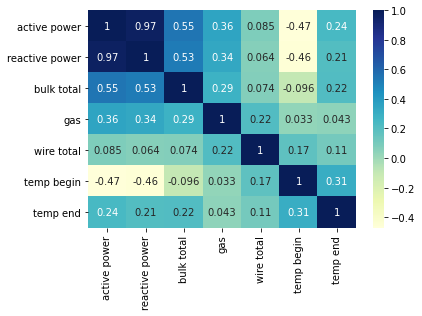

In [39]:
display(data_total.corr(method='spearman'))

dataplot = sns.heatmap(data_total.corr(method='spearman'), cmap="YlGnBu", annot=True)

plt.show()

Тут необходимо принять решение об удалении reactive power из датасета, так как коэффициент корреляции по спирмену очень высок!

In [40]:
data_total = data_total.drop('reactive power', 1)

## 3. Моделирование

In [41]:
df = data_total

In [42]:
df.head()

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>ОК. Вот здесь, если построить матрицу корреляций, то увидим, что активная и реактивная - оооочень сильную связь имеют. От реактивной можно смело избавиться.

Разбиваем датасет на признаки и таргеты

In [43]:
target = df['temp end']
features = df.drop(['temp end'], axis = 1)

Разделение на тестовую и обучающую выборку

In [44]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.25, random_state = 12345)

In [45]:
print('Размеры тренировочной выборки:')
print(features_train.shape)
print(target_train.shape)

print('Размеры валидационной выборки:')
print(features_test.shape)
print(target_test.shape)

In [46]:
print('Скаляризация - уравновешивание признаков...')

scaler = StandardScaler()

features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

***Простая модель линейной регрессии***

In [47]:
model1 = LinearRegression()
model1.fit(features_train, target_train)

In [48]:
predictions1_train = model1.predict(features_train)

In [49]:
print('MAE модели на обучающей выборке:', mean_absolute_error(target_train, predictions1_train))

In [50]:
predictions1_test = model1.predict(features_test)

In [51]:
print('MAE модели на тестовой выборке:', mean_absolute_error(target_test, predictions1_test))

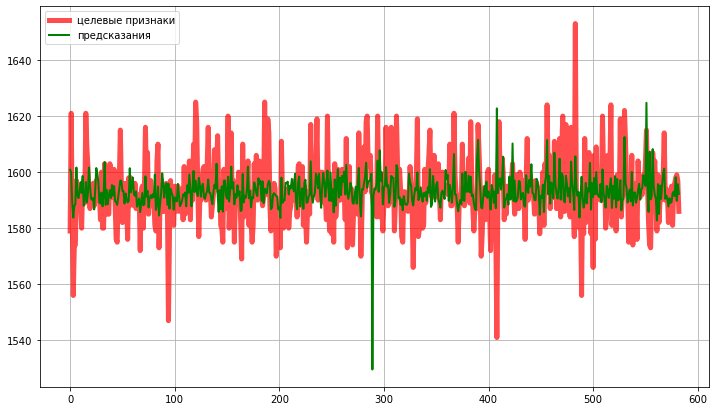

In [52]:
plt.figure(figsize=(12, 7))
plt.plot(list(target_test), '-r', alpha=0.7, label="целевые признаки", lw=5)
plt.plot(list(predictions1_test), '-g', label="предсказания", lw=2)
plt.legend()
plt.grid(True)

***Попробуем обучить и подобрать гиперпараметры для модели градиентного бустинга***

In [53]:
scoring = make_scorer(mean_absolute_error)

In [65]:
parametrs = {'learning_rate': list(np.arange(0.01, 0.05, 0.01)),
                'n_estimators': range(300, 500, 10)}

In [66]:
model = LGBMRegressor(random_state=12345)
model.fit(features_train, target_train)
predictions_train = model.predict(features_train)

In [67]:
print('MAE модели на обучающей выборке:', mean_absolute_error(target_train, predictions_train))

In [133]:
grid = GridSearchCV(model, parametrs, cv=5, scoring = scoring, verbose = 0)
grid.fit(features_test, target_test)
grid.best_params_

In [206]:
model = LGBMRegressor(random_state=12345, learning_rate = 0.01, n_estimators = 390)
model.fit(features_train, target_train)
predictions_train = model.predict(features_train)

In [207]:
print('MAE модели на обучающей выборке:', mean_absolute_error(target_train, predictions_train))

## 4. Проверка модели на тестовой выборке

In [208]:
predictions_test = model.predict(features_test)

In [209]:
print('MAE модели на тестовой выборке:', mean_absolute_error(target_test, predictions_test))

**Вывод по части "Код решения"**

Полученный результат MAE на тестовой выборке равен: 6.707

Для регрессии значения конечной температуры была выбрана модель градиентного бустинга LGBMRegressor с соответствующими параметрами, примерно подобранными при помощи GridSearchCV.

GridSearchCV ориентируется на наименьшую MAE на обучающей выборке, но чтобы получить таковую на тестовой были подобраны следующие параметры {'learning_rate': 0.01, 'n_estimators': 390}.

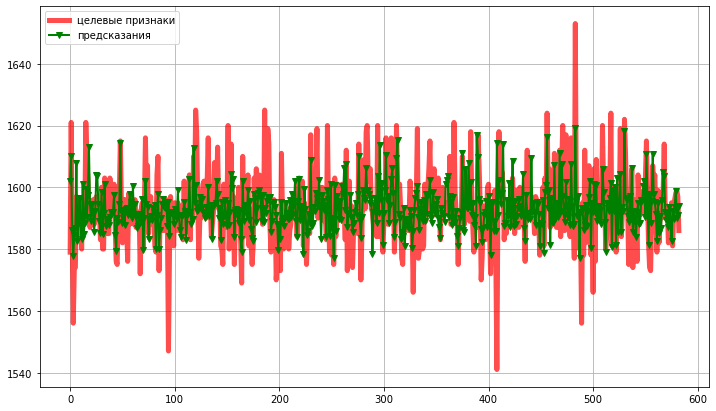

In [62]:
plt.figure(figsize=(12, 7))
plt.plot(list(target_test), '-r', alpha=0.7, label="целевые признаки", lw=5)
plt.plot(list(predictions_test), 'v-g', label="предсказания", lw=2)
plt.legend()
plt.grid(True)

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
ОК, Александр,. скажу, что уверенная работа, на мой взгляд). Да, всё просто, но ведь это результат твоего труда на протяжении 8 месяцев.<br>
Обработка данных, модельная работа, конечные результаты - многое удалось как надо<br> Очень здорово, что сразу ищешь новые фичи, думаешь над ними, анализируешь. Это тот самый подход, который нужен, чтобы искать ту саму модель для заказчика)<br> Осталось лишь несколько вопросов с моей стороны))<br>
<font color='red'>    
1) При моделировании существует проблематика мультиколлинеарности.(когда количественные факторы модели имеют сильную корреляцию друг с другом - больше 0.8).Есть ли она у нас?  Если есть - надо  решать по понятиям:) (удалить лишнее). Тут, как и написал выше - построить матрицу корреляций и бет видно, что реактивную можно убрать<br><br>
    
2) Попробуй с помощью команды feature_importances_ выводить график важности факторов. Отличная вещь будет: высока яметрика + график рейтинаг факторов по силе влияния на целевой признак). Важнейшая часть любого модельного финала.
Если видно, что часть факторов - слабозначимые для модели. Т.е. не значительно влияют на целевую переменную, то их смело можно убирать из модели. Ну и для бизнеса доносить: так мол и так - на эти факторы надо обращать внимание, а эти не влияют. (пример ниже)<br>
    
<font color='green'>
<font color='green'>
Однозначно видно, что ты технически сделал хорошую работу.<br>
Просто эти два пункта - важный момент в алгоритме моделирования. И хотелось, чтобы они у тебя остались в финале.<br>

Спасибо)<br>
БУДУ ЖДАТЬ КОММЕНТАРИЕВ.

In [63]:
features

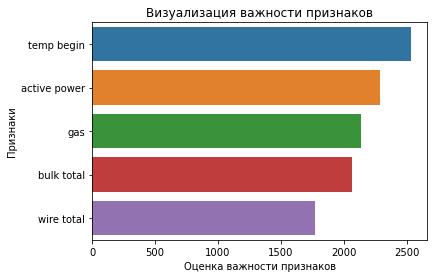

In [64]:
def chart_feature_imp(model):
    feature_imp = pd.Series(model.feature_importances_, index=features.columns).sort_values(ascending=False)

    ax = sns.barplot(x=feature_imp, y=feature_imp.index)
    _ = ax.set(xlabel='Оценка важности признаков', ylabel='Признаки')
    _ = ax.set_title('Визуализация важности признаков')

chart_feature_imp(model)

<div style="background: #bbbbbb; padding: 5px; border: 1px solid black; border-radius: 5px;">
<font color='black'> <u>КОММЕНТАРИЙ СТУДЕНТА :)</u>
</font>
<font color='white'><br>
1) Выше построил модель мультиколлинеарности (типа обзор есть она или нет и все такое) и хитампы, на основе чего убрал столбец reactive power и заново обучил модель! Кстати, результаты получились хуже, чем со столбцом "reactive power", но да ладно!
    
2) Чуток подправил ваш код и он заработал с моей моделью! Интересная штука... Я это воспринимаю как фидбек от модели, которая после обучения рассказывает тебе какие факторы сыграли решающую роль при ее обучении, это примерно так, да?)
    
Со всем остальным вроде как все ок!

Спасибо большое за ваши дополнения к проекту, с ними он действительно выглядит более последовательным и "одно из другого вытекающим", ведь главное, чтобы людям был понятен мой код, последовательность мыслей и рассуждения и результат?
    
Также спасибо за "толчок" к пониманию что такое мультиколлинеарность, новую команду feature_importances_ и план структурированного плана проекта :D
    
Все равно ожидал, что в выпускном проекте будет какая-то мудреная нейросетка или NLP... Но сам кейс от этого не перестает быть интересным и увлекательным, особенно тогда, когда приходится самому погружаться в производственный и бизнес процесс для понимания, что надо делать))

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='green'><br>
1) Если чуток - не страшно) Зато "разгрузили" модель.<br>
2) Верно, это рейтинг факторов, которые влияют на целевую. И едст бизнес заочет поработать над её стабильностью то вот с наиболее сильных и стоит начинать. Это помогает сконцентрироваться на главном и не распыляться на втростепенное.<br>
    
Нейронка - дело хорошее. Но не все задчи ей подвластны. Если тебе интересна тема распознования образов/текста, то ОК - она - то, что надо. В нашей задаче - можно обойтись и простыми моделями. Тут ваджно понять бизнес-процесс)

## Итоговый отчет по решению.

**План работы:**  
- Провести исследовательский анализ данных:
    - Посмотреть на распределение исходных данных
    - Проанализировать порядок событий в производственном процессе
    - Исключить партии, которые не имеют последнего замера температуры, либо первый замер соответствует последнему, либо замеры отсутствуют 
    - Оставить только события, которые находятся в промежутке между первым и последним замерами
- Подобрать признаки, на которых будет обучаться модель:
    - Сгенерировать ряд признаков
    - Проверить признаки на мультиколлинеарность, исключить лишние
    - Провести масштабирование признаков
- Построить модель, которая предскажет температуру стали:
    - Сформировать обучающую, валидационную и тестовую выборки
    - Выбрать несколько моделей и проверить их эффективность на валидационной выборке с помощью показателя эффективности MAE
    - Эффективность лучшей модели проверить на тестовой выборке

### Отчет

***1) Соответствие плану:***

    - Был проведен исследовательский анализ данных входящих датасетов, предобработка и исключение ненужных признаков и событий;
    
    - По результатам предыдущего этапа был сгенерирован ряд признаков для дальнейшего обучения на них модели; признаки были проверены на мультиколлениарность (лишние, при условии высокой корреляции с другими признаками и важности факторов, были удалены) и масштабированы;
    
    - Была построена модель, предсказывающая температуру, MAE которой на тестовой выборке получилась 6.707 (то есть, в среднем, модель дает результат с точностью +-6.7 градусов).
    
    Итого: все пункты, заявленные ранее в плане проекта были выполнены с достижением соответствующего оптимального результата MAE обученной модели.
    
***2) Трудности, возникшие в проекте:***

    - Данные были разбиты на разные таблицы: при формировании итоговой таблицы признаков и таргетов для обучения модели были необходимы предобработка и формирование отдельного датасета путем отбрасывания и добавления новых столбцов, а также проверки на мультиколлинеарность и важность признаков;
    
    - Подбор гиперпараметров модели градиентного бустинга.
    
    Итого: итоговая таблица была успешно сформирована с учетом всех факторов; решение трудности подбора гиперпараметров модели градиентного бустинга - использование моделей подбора гиперпараметров, таких как GridSearchCV.
    
***3) Ключевые шаги в решении задачи модели:***

    - Несомненно, наиболее важным фактором в решении кейса есть наличие и правильность составления плана работы! Это основа основ, определяющая наш итоговый результат, при следовании которой мы сможем достичь необходимого результата, а при отклонении - извлечь для себя новые инсайты, направления развития и пути совершенстсования разрабатываемой модели прогнозирования;

    - Правильное формирование итогового датасета для обучения моделей на нем: важно правильно подобрать признаки, а также проверить необходимость их наличия при помощи проверки на мультиколлинеарность, ведь слишком большое число признаков может "загрузить" модель, а пропуски и выбросы в признаках привести к ошибкам в предсказаниях модели;
    
    - Уделение должного внимания подбору гиперпараметров: от использования моделей подбора параметров до применения навыков собственной интуиции :).
    
    Итого: была получена модель с соответствующими характеристиками, описанными пунктом ниже.
    
***4) Итоговая модель*** - модель градиентного бустинга LGBMRegressor(). MAE итоговой модели на тестовой выборке - 6.707 (то есть, в среднем, модель дает результат с точностью +-6.7 градусов).